In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
import pandas as pd

# 160 trials

In [3]:
inputfile = open('logfile')

In [4]:
df_alltrials = pd.DataFrame(columns=['subj', 'acc', 'script','k'])

In [5]:
for i in range(1471): inputfile.readline() # skip first 1470 lines

In [6]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            acc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])

            newdict = {'subj':subjnum,'acc':acc,'script':script,'k':k}

            df_alltrials = df_alltrials.append(newdict,ignore_index=True)


/tmp/ipykernel_36279/3375501616.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_alltrials = df_alltrials.append(newdict,ignore_index=True)
/tmp/ipykernel_36279/3375501616.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_alltrials = df_alltrials.append(newdict,ignore_index=True)
/tmp/ipykernel_36279/3375501616.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_alltrials = df_alltrials.append(newdict,ignore_index=True)
/tmp/ipykernel_36279/3375501616.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_alltrials = df_alltrials.append(newdict,ignore_index=True)
/tmp/ipykernel_36279/3375501616.py:29: FutureWarning: Th

In [7]:
df_alltrials

,subj,acc,script,k
0,2,0.53750,hierarchical_all_subjects.py,1
1,4,0.47500,hierarchical_all_subjects.py,1
2,10,0.53125,hierarchical_all_subjects.py,1
3,41,0.63750,hierarchical_all_subjects.py,1
4,43,0.59375,hierarchical_all_subjects.py,1
...,...,...,...,...
184,53,0.80625,hierarchical_all_subjects.py,11
185,54,0.80000,hierarchical_all_subjects.py,11
186,55,0.71875,hierarchical_all_subjects.py,11
187,2,0.75000,hierarchical_all_subjects.py,12


<function matplotlib.pyplot.show(close=None, block=None)>

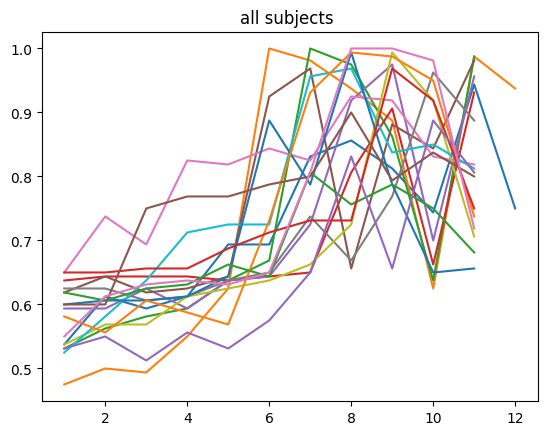

In [8]:
for i in list(df_alltrials['subj'].unique()):
    y = df_alltrials[df_alltrials['subj']==i]['acc']
    x = df_alltrials[df_alltrials['subj']==i]['k']
    plt.plot(x,y)
    plt.title('all subjects ')

plt.show

In [9]:
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

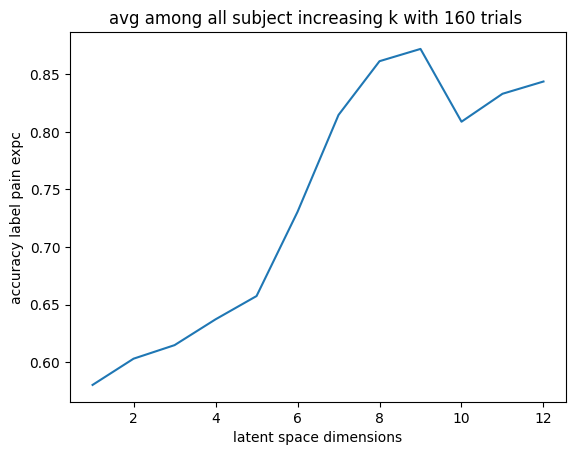

In [10]:
list_y=[]
list_x=[]
for i in list(df_alltrials['k'].unique()):
    list_y.append(df_alltrials[df_alltrials['k']==i]['acc'].mean())
    list_x.append(df_alltrials[df_alltrials['k']==i]['k'].unique())
plt.plot(list_x,list_y)
plt.title('avg among all subject increasing k with 160 trials ')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.show

# few trials

In [11]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [12]:
inputfile = open('logfile')

In [13]:
df_fewtrials = pd.DataFrame(columns=['subj', 'acc', 'script','k'])

In [14]:
for i in range(1471): inputfile.readline() # skip first 1470 lines

In [15]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects_less_trials.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])

            print(subjnum)

            strline = strline[strline.find(':')+2:]
            acc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find('dims')+6:]
            print(strline)
            k = int(strline[:2])

            newdict = {'subj':subjnum,'acc':acc,'script':script,'k':k}

            df_fewtrials = df_fewtrials.append(newdict,ignore_index=True)


2
1

4
1

10
1

41
1

43
1

44
1

45
1

46
1

47
1

48
1

49
1

50
1

51
1

52
1

53
1

54
1

55
1

2
2

4
2

10
2

41
2

43
2

44
2

45
2

46
2

47
2

48
2

49
2

50
2

51
2

52
2

53
2

54
2

55
2

2
3

4
3

10
3

41
3

43
3

44
3

45
3

46
3

47
3

48
3

49
3

50
3

51
3

52
3

53
3

54
3

55
3

2
4

4
4

10
4

41
4

43
4

44
4

45
4

46
4

47
4

48
4

49
4

50
4

51
4

52
4

53
4

54
4

55
4

2
5

4
5

10
5

41
5

43
5

44
5

45
5

46
5

47
5

48
5

49
5

50
5

51
5

52
5

53
5

54
5

55
5

2
6

4
6

10
6

41
6

43
6

44
6

45
6

46
6

47
6

48
6

49
6

50
6

51
6

52
6

53
6

54
6

55
6

2
7

4
7

10
7

41
7

43
7

44
7

45
7

46
7

47
7

48
7

49
7

50
7

51
7

52
7

53
7

54
7

55
7

2
8

4
8

10
8

41
8

43
8

44
8

45
8

46
8

47
8

48
8

49
8

50
8

51
8

52
8

53
8

54
8

55
8

2
9

4
9

10
9

41
9

43
9

44
9

45
9

46
9

47
9

48
9

49
9

50
9

51
9

52
9

53
9

54
9

55
9

2
10

4
10

10
10

41
10

43
10

44
10

45
10

46
10

47
10

48
10

49
10

50
10

51
10

52
10

53
1

In [16]:
df_fewtrials

,subj,acc,script,k
0,2,0.517857,hierarchical_all_subjects_less_trials.py,1
1,4,0.455357,hierarchical_all_subjects_less_trials.py,1
2,10,0.598214,hierarchical_all_subjects_less_trials.py,1
3,41,0.651786,hierarchical_all_subjects_less_trials.py,1
4,43,0.589286,hierarchical_all_subjects_less_trials.py,1
...,...,...,...,...
199,51,0.732143,hierarchical_all_subjects_less_trials.py,12
200,52,0.821429,hierarchical_all_subjects_less_trials.py,12
201,53,0.687500,hierarchical_all_subjects_less_trials.py,12
202,54,0.705357,hierarchical_all_subjects_less_trials.py,12


In [17]:
list_y_few=[]
list_x_few=[]
for i in list(df_fewtrials['k'].unique()):
    list_y_few.append(df_fewtrials[df_fewtrials['k']==i]['acc'].mean())
    list_x_few.append(df_fewtrials[df_fewtrials['k']==i]['k'].unique())

In [18]:
list_x_few

[array([1], dtype=object),
 array([2], dtype=object),
 array([3], dtype=object),
 array([4], dtype=object),
 array([5], dtype=object),
 array([6], dtype=object),
 array([7], dtype=object),
 array([8], dtype=object),
 array([9], dtype=object),
 array([10], dtype=object),
 array([11], dtype=object),
 array([12], dtype=object)]

<function matplotlib.pyplot.show(close=None, block=None)>

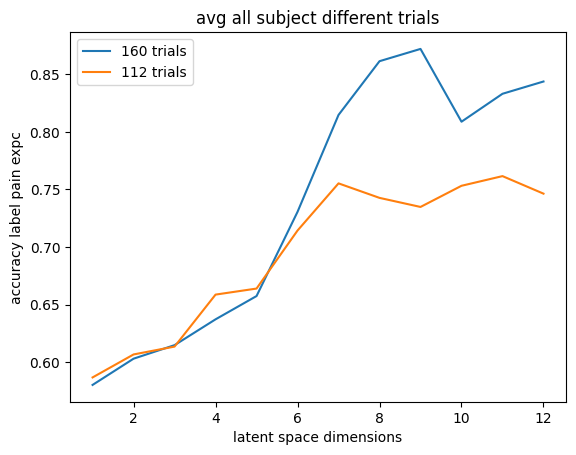

In [19]:
plt.plot(list_x,list_y)
plt.plot(list_x_few,list_y_few)
plt.title('avg all subject different trials')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy label pain expc')
plt.legend(['160 trials','112 trials'])
plt.show

# EDA

In [20]:
inputfile = open('logfile_eda')

In [21]:
df_eda = pd.DataFrame(columns=['subj', 'pear', 'conc', 'script','k'])

In [22]:
for i in range(47): inputfile.readline() # skip first 1470 lines

In [23]:
for i in range(3000):

    line = inputfile.readline()

    if 'hierarchical_all_subjects_less_trials_eda.py' in line:
        if 'Subj num:' in line:
            strline = str(line)

            strline = strline[43:]
            subjnum = str(strline[:strline.find(' ')])
            if(int(subjnum)>9):
                strline = str(strline[strline.find(' ')+2:])
            else:
                strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            pear = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            conc = float(strline[:strline.find(' ')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find(':')+2:]
            script = str(strline[:strline.find(',')])
            strline = str(strline[strline.find(' ')+1:])

            strline = strline[strline.find('dims')+6:]
            k = int(strline[:2])

            newdict = {'subj':subjnum,'pear':pear,'conc':conc, 'script':script,'k':k}

            df_eda = df_eda.append(newdict,ignore_index=True)


In [24]:
df_eda

,subj,pear,conc,script,k
0,2,0.7911,0.4969,hierarchical_all_subjects_less_trials_eda.py,1
1,4,0.8181,0.5430,hierarchical_all_subjects_less_trials_eda.py,1
2,10,0.7861,0.0919,hierarchical_all_subjects_less_trials_eda.py,1
3,41,0.8280,0.5424,hierarchical_all_subjects_less_trials_eda.py,1
4,43,0.7729,0.3884,hierarchical_all_subjects_less_trials_eda.py,1
...,...,...,...,...,...
201,53,0.7759,0.4183,hierarchical_all_subjects_less_trials_eda.py,12
202,54,0.9385,0.8436,hierarchical_all_subjects_less_trials_eda.py,12
203,55,0.9056,0.7906,hierarchical_all_subjects_less_trials_eda.py,12
204,2,0.8762,0.6517,hierarchical_all_subjects_less_trials_eda.py,13


In [25]:
list_y_conc_eda=[]
list_y_pear_eda = []
list_x_eda=[]
for i in list(df_eda['k'].unique()):
    list_y_pear_eda.append(df_eda[df_eda['k']==i]['pear'].mean())
    list_y_conc_eda.append(df_eda[df_eda['k']==i]['conc'].mean())
    list_x_eda.append(df_eda[df_eda['k']==i]['k'].unique())

In [26]:
print(len(list_x_few))
print(len(list_x_eda))
print((list_x_few)[:4])
list_x_eda

12
13
[array([1], dtype=object), array([2], dtype=object), array([3], dtype=object), array([4], dtype=object)]


[array([1], dtype=object),
 array([2], dtype=object),
 array([3], dtype=object),
 array([4], dtype=object),
 array([5], dtype=object),
 array([6], dtype=object),
 array([7], dtype=object),
 array([8], dtype=object),
 array([9], dtype=object),
 array([10], dtype=object),
 array([11], dtype=object),
 array([12], dtype=object),
 array([13], dtype=object)]

<function matplotlib.pyplot.show(close=None, block=None)>

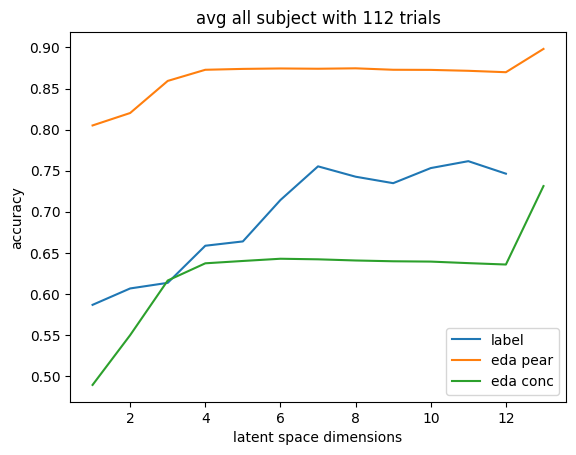

In [27]:
plt.plot((list_x_few),list_y_few)
plt.plot(list_x_eda,list_y_pear_eda)
plt.plot(list_x_eda,list_y_conc_eda)
plt.title('avg all subject with 112 trials')
plt.xlabel('latent space dimensions')
plt.ylabel('accuracy')
plt.legend(['label','eda pear','eda conc'])
plt.show